In [1]:
from src.pandas_helper import colInfo
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import RandomForestClassifier

In [11]:
df_titanic = pd.read_csv('./data/train.csv')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Couple of null values in Age

In [5]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_titanic.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

PassengerId


,Number,Percentage
,,
Zeroes,0,0.00 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,891,100.00 %
Mean,446.00,-
Median,446.00,-


,Value Count,% Value Count
1,1,0.112233
599,1,0.112233
588,1,0.112233
589,1,0.112233
590,1,0.112233
591,1,0.112233
592,1,0.112233
593,1,0.112233
594,1,0.112233
595,1,0.112233


None

Survived


,Number,Percentage
,,
Zeroes,549,61.62 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.22 %
Mean,0.38,-
Median,0.00,-


,Value Count,% Value Count
0,549,61.616162
1,342,38.383838


None

Pclass


,Number,Percentage
,,
Zeroes,0,0.00 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,3,0.34 %
Mean,2.31,-
Median,3.00,-


,Value Count,% Value Count
3,491,55.106622
1,216,24.242424
2,184,20.650954


None

Name


,Number,Percentage
,,
Zeroes,0,0.00 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,891,100.00 %
Mean,0.00,-
Median,0.00,-


,Value Count,% Value Count
"Braund, Mr. Owen Harris",1,0.112233
"Boulos, Mr. Hanna",1,0.112233
"Frolicher-Stehli, Mr. Maxmillian",1,0.112233
"Gilinski, Mr. Eliezer",1,0.112233
"Murdlin, Mr. Joseph",1,0.112233
"Rintamaki, Mr. Matti",1,0.112233
"Stephenson, Mrs. Walter Bertram (Martha Eustis)",1,0.112233
"Elsbury, Mr. William James",1,0.112233
"Bourke, Miss. Mary",1,0.112233
"Chapman, Mr. John Henry",1,0.112233


None

Sex


,Number,Percentage
,,
Zeroes,0,0.00 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.22 %
Mean,0.00,-
Median,0.00,-


,Value Count,% Value Count
male,577,64.758698
female,314,35.241302


None

Age


,Number,Percentage
,,
Zeroes,0,0.00 %
Missing,177,19.87 %
Unknown,0,0.00 %
Uniques,89,9.99 %
Mean,29.70,-
Median,28.00,-


,Value Count,% Value Count
24.000000,30,4.201681
22.000000,27,3.781513
18.000000,26,3.641457
19.000000,25,3.501401
28.000000,25,3.501401
30.000000,25,3.501401
21.000000,24,3.361345
25.000000,23,3.221289
36.000000,22,3.081232
29.000000,20,2.801120


None

SibSp


,Number,Percentage
,,
Zeroes,608,68.24 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,7,0.79 %
Mean,0.52,-
Median,0.00,-


,Value Count,% Value Count
0,608,68.237935
1,209,23.456790
2,28,3.142536
4,18,2.020202
3,16,1.795735
8,7,0.785634
5,5,0.561167


None

Parch


,Number,Percentage
,,
Zeroes,678,76.09 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,7,0.79 %
Mean,0.38,-
Median,0.00,-


,Value Count,% Value Count
0,678,76.094276
1,118,13.243547
2,80,8.978676
5,5,0.561167
3,5,0.561167
4,4,0.448934
6,1,0.112233


None

Ticket


,Number,Percentage
,,
Zeroes,0,0.00 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,681,76.43 %
Mean,0.00,-
Median,0.00,-


,Value Count,% Value Count
347082,7,0.785634
CA. 2343,7,0.785634
1601,7,0.785634
3101295,6,0.673401
CA 2144,6,0.673401
347088,6,0.673401
S.O.C. 14879,5,0.561167
382652,5,0.561167
LINE,4,0.448934
PC 17757,4,0.448934


None

Fare


,Number,Percentage
,,
Zeroes,15,1.68 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,248,27.83 %
Mean,32.20,-
Median,14.45,-


,Value Count,% Value Count
8.050000,43,4.826038
13.000000,42,4.713805
7.895800,38,4.264871
7.750000,34,3.815937
26.000000,31,3.479237
10.500000,24,2.693603
7.925000,18,2.020202
7.775000,16,1.795735
7.229200,15,1.683502
0.000000,15,1.683502


None

Cabin


,Number,Percentage
,,
Zeroes,0,0.00 %
Missing,687,77.10 %
Unknown,0,0.00 %
Uniques,148,16.61 %
Mean,0.00,-
Median,0.00,-


,Value Count,% Value Count
B96 B98,4,1.960784
G6,4,1.960784
C23 C25 C27,4,1.960784
C22 C26,3,1.470588
F33,3,1.470588
F2,3,1.470588
E101,3,1.470588
D,3,1.470588
C78,2,0.980392
C93,2,0.980392


None

Embarked


,Number,Percentage
,,
Zeroes,0,0.00 %
Missing,2,0.22 %
Unknown,0,0.00 %
Uniques,4,0.45 %
Mean,0.00,-
Median,0.00,-


,Value Count,% Value Count
S,644,72.440945
C,168,18.897638
Q,77,8.661417


None

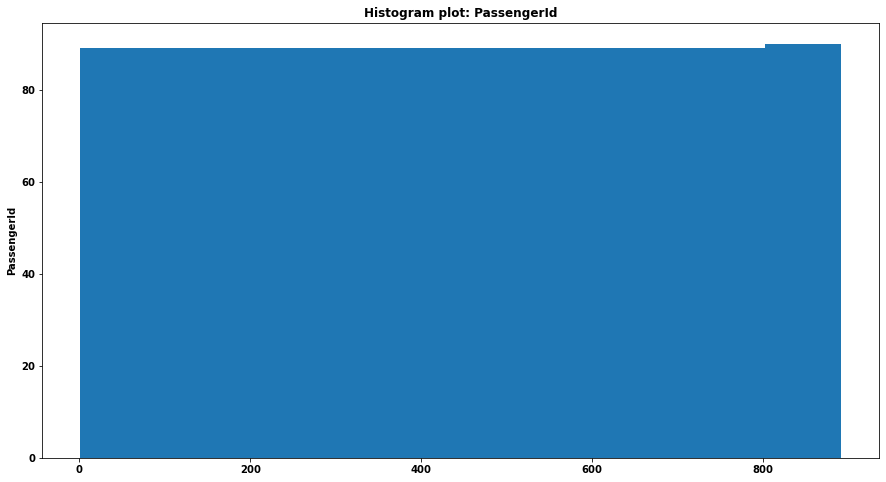

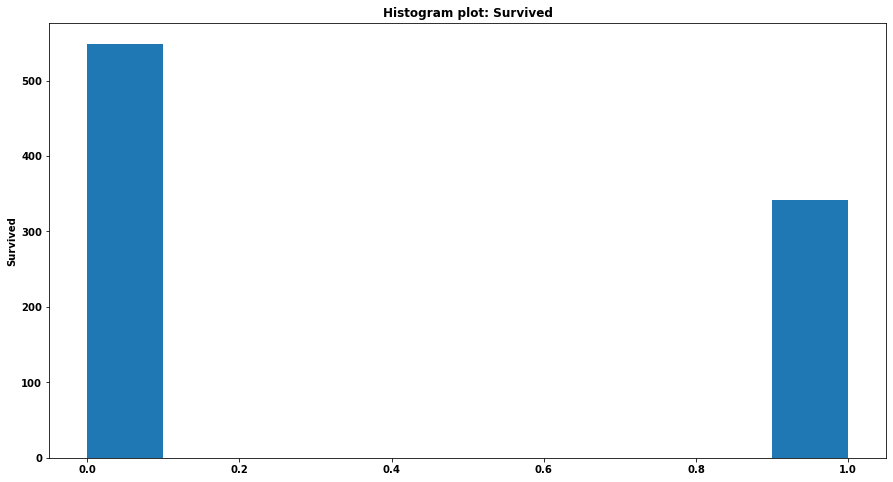

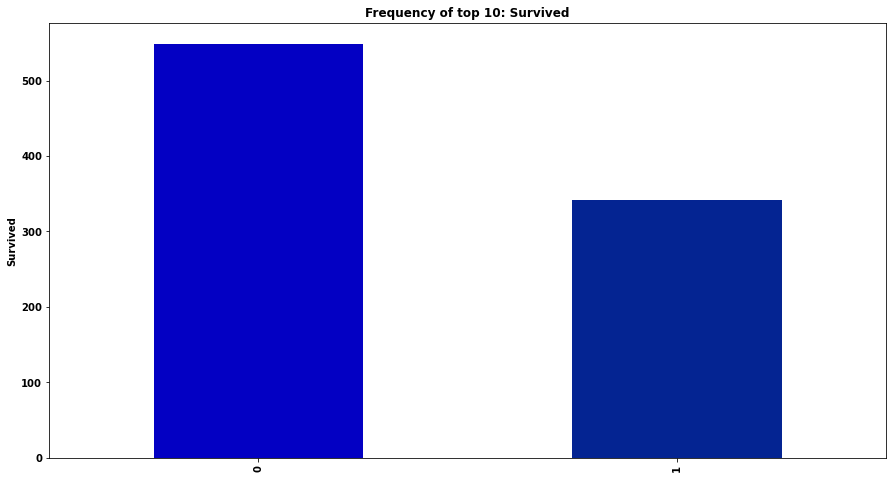

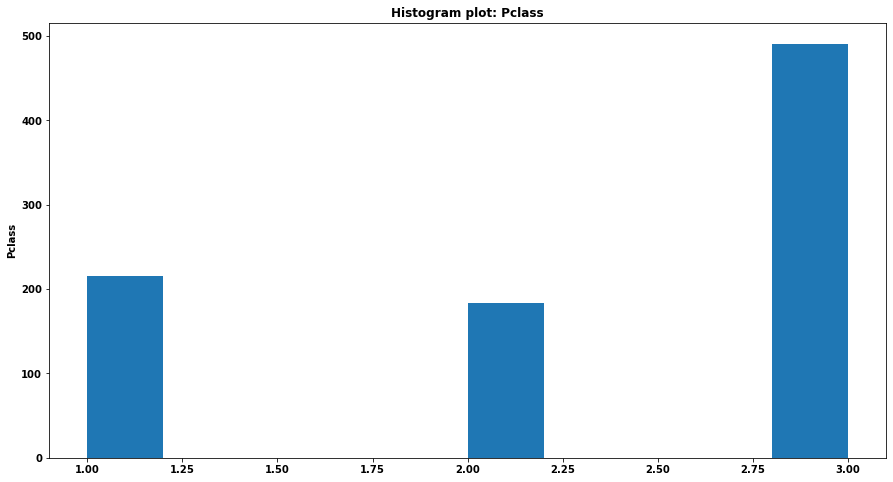

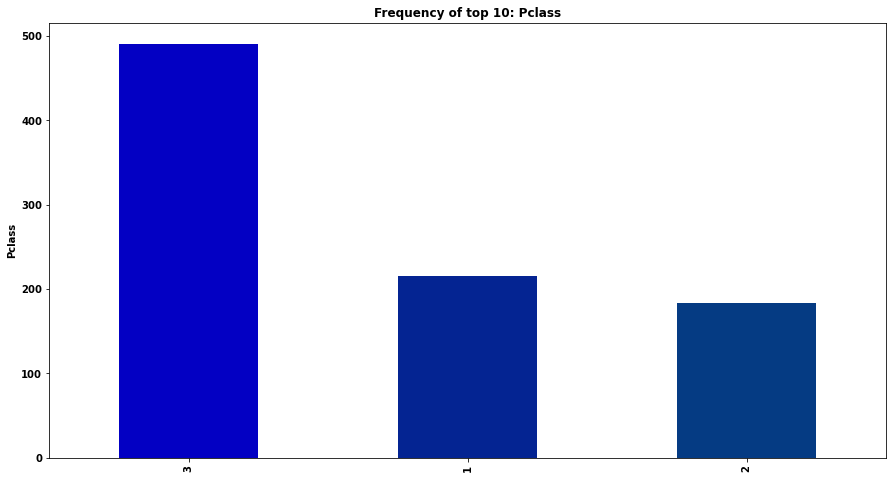

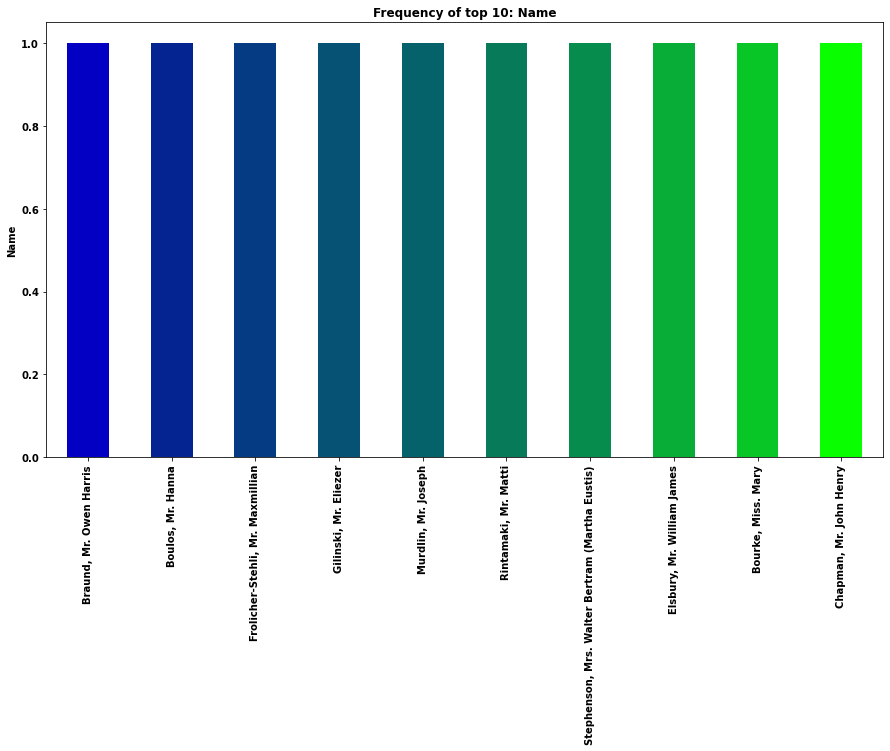

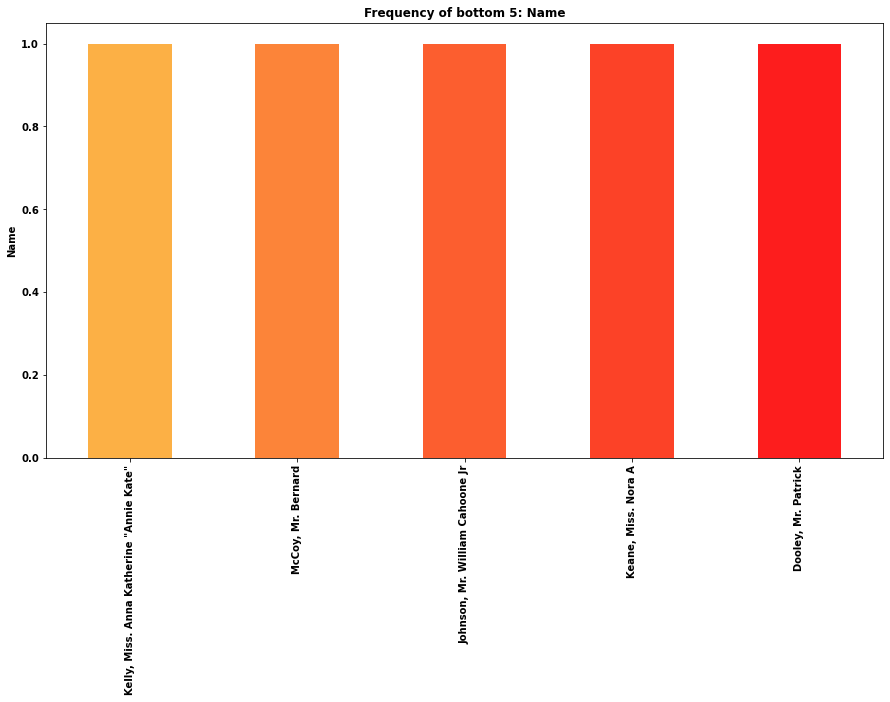

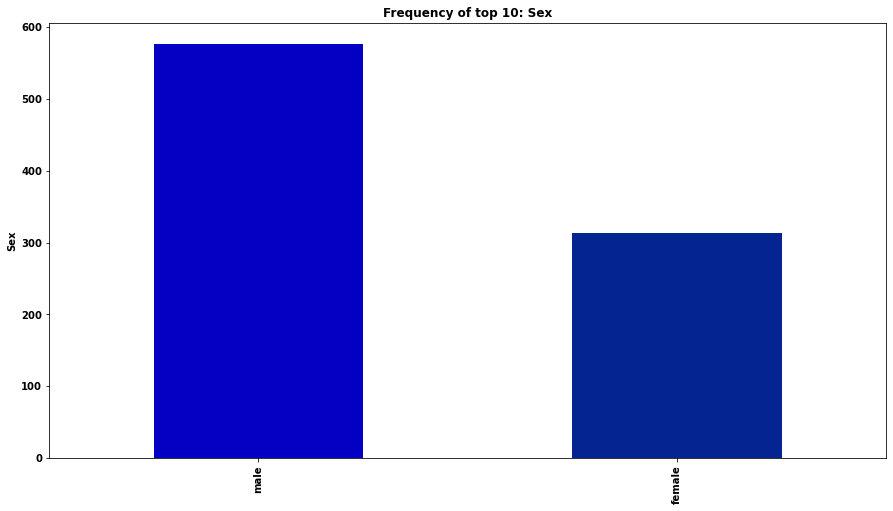

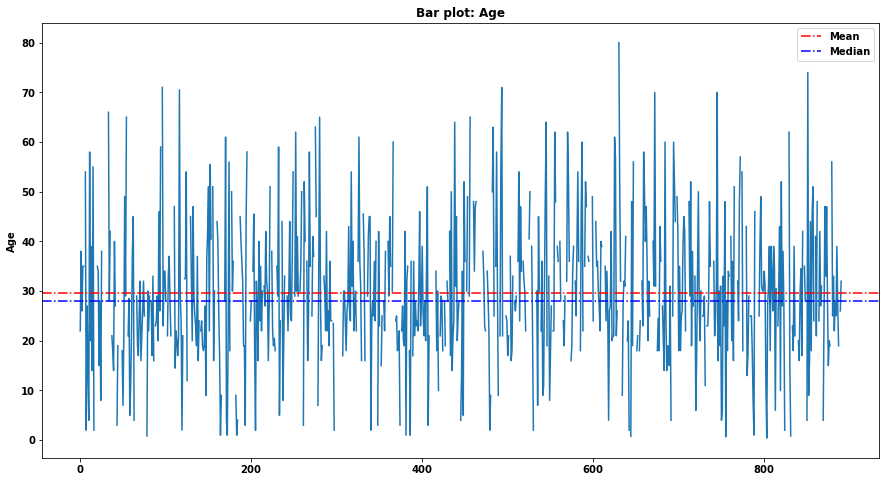

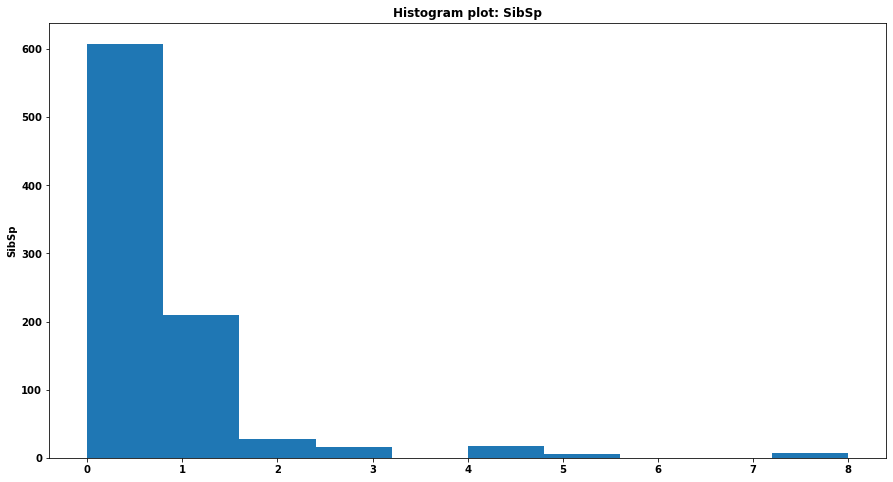

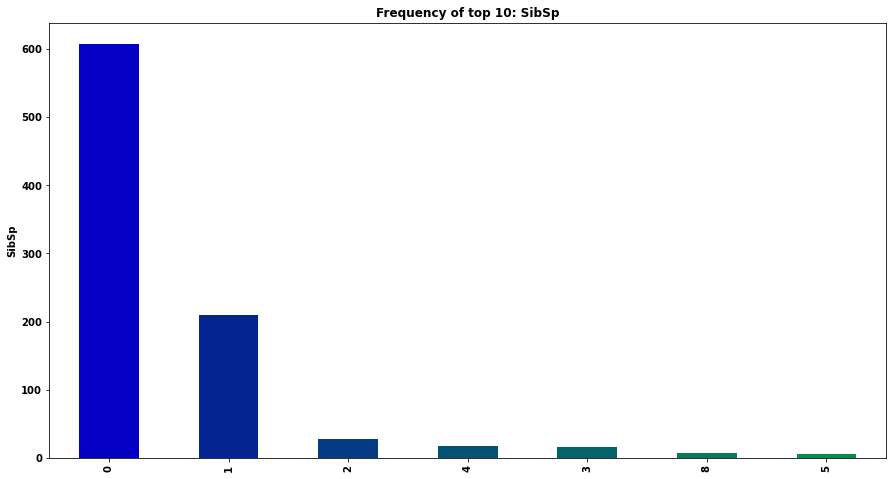

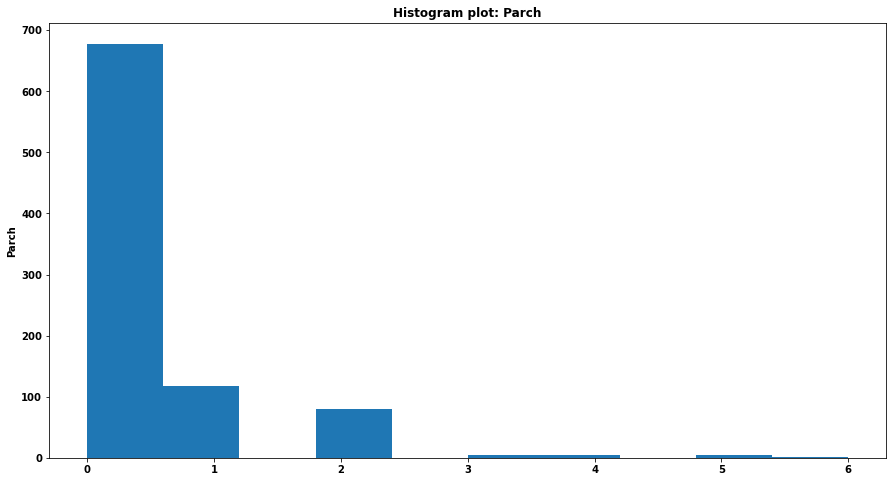

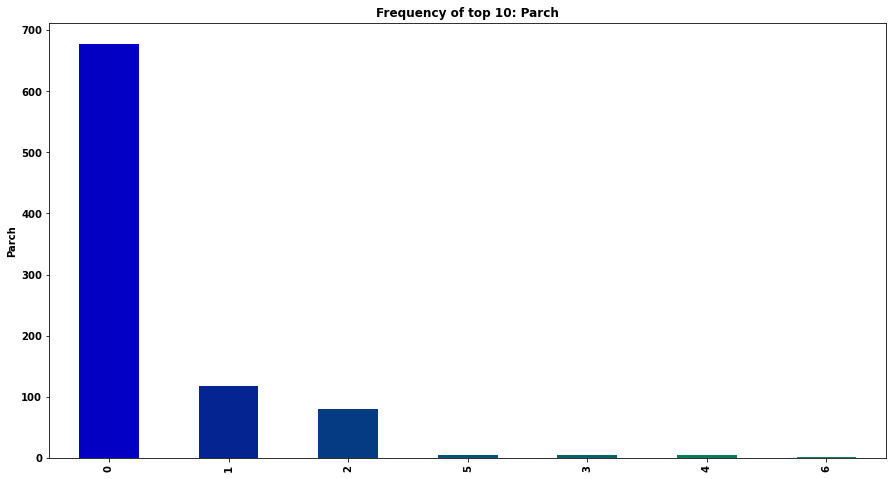

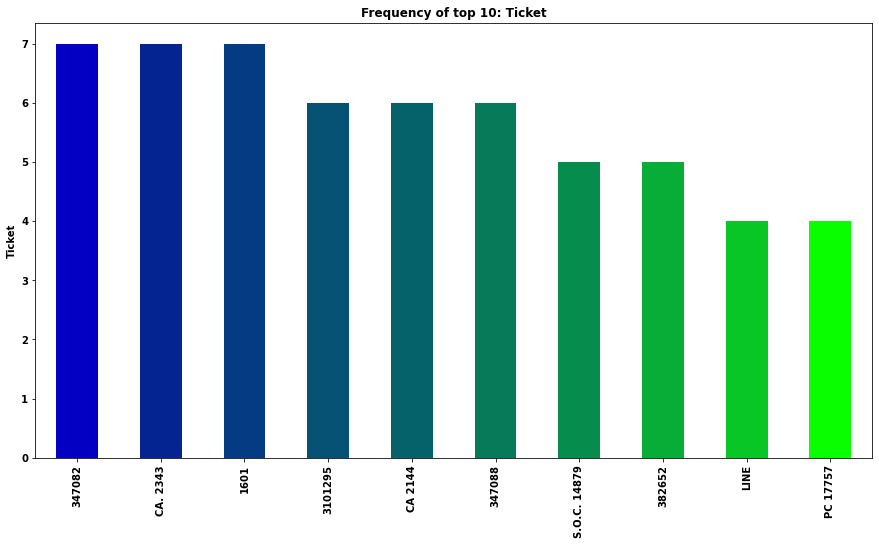

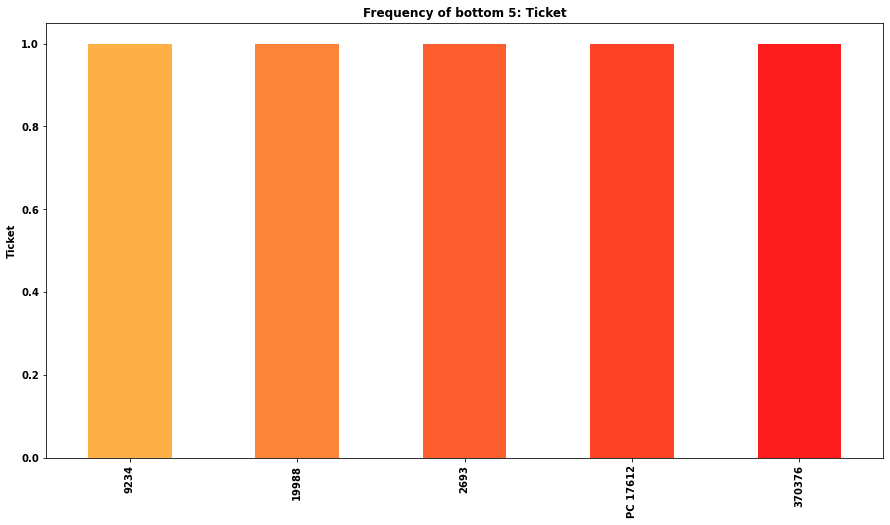

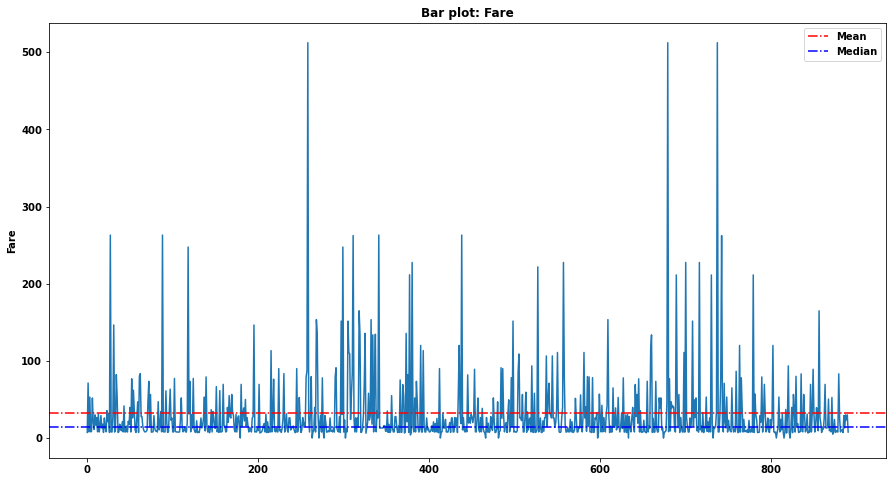

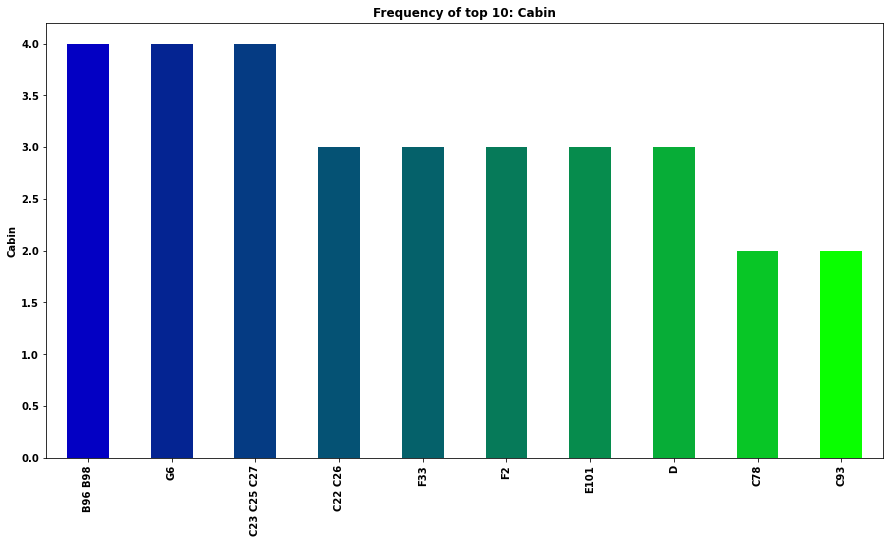

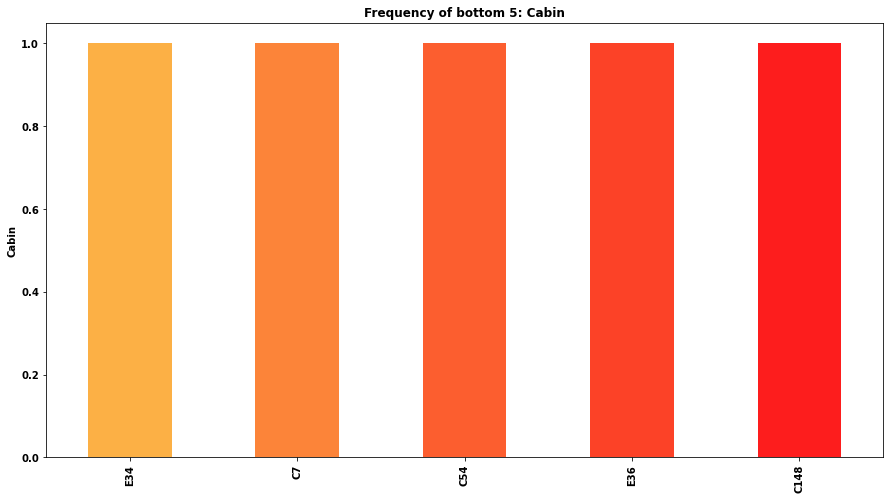

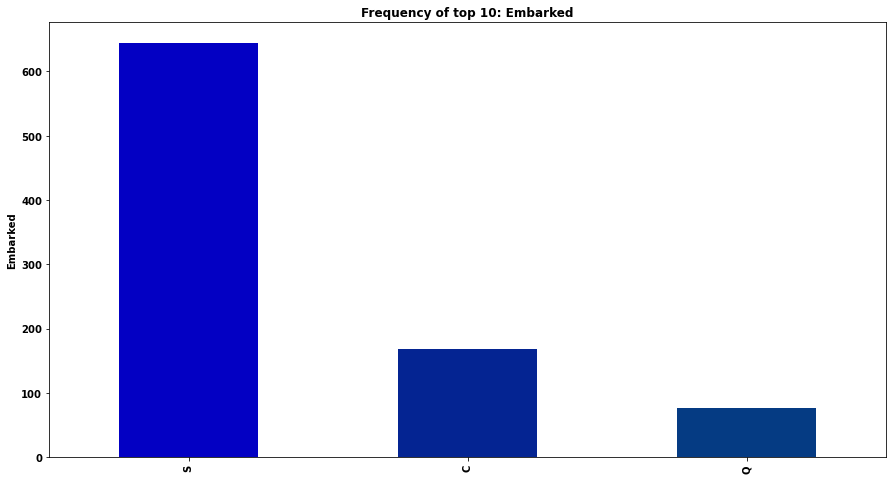

In [7]:
for col in df_titanic.columns:
    print(col)
    display(colInfo(df_titanic[col]))

In [8]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df_titanic.drop(columns = ['PassengerId','Name','SibSp','Parch','Embarked','Cabin','Ticket'], inplace=True)
df_titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


# Impute age

In [21]:
df_titanic.Age.median()

28.0

In [23]:
df_titanic.Age.fillna(df_titanic.Age.median(),inplace=True)

# One Hot Encode Sex

## 1 = male, 0 = female

In [26]:
df_titanic.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [27]:
pd.get_dummies(df_titanic.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [25]:
df_titanic.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


# Construct Pipelines